# 1. Defining Problem Statement

## Ola, a prominent ride-sharing service, is facing a substantial challenge in recruiting and retaining drivers. Driver churn, where drivers frequently stop working for the company or switch to competitors like Uber due to fluctuations in earnings, is a significant concern. As Ola expands, this high churn rate could escalate into a more pressing issue. To address this problem, the Analytics Department at Ola aims to predict driver attrition based on driver attributes and take proactive measures to reduce turnover.

## Key Points:

### High Driver Churn: Ola is experiencing a persistently high driver churn rate. Drivers easily leave the platform due to rate fluctuations and may switch to competitors.

### Recruitment Challenges: Ola is actively recruiting new drivers, but this process is expensive. Acquiring new drivers involves significant costs, including onboarding and incentives.

### Impact on Morale: Frequent driver departures negatively impact the morale of the organization. A stable driver base is crucial for consistent service quality.

### Objective: The primary goal is to predict driver attrition and subsequently implement retention strategies to mitigate churn.

## Approach:

### Churn Analysis: Conduct a thorough analysis of historical driver churn to understand the extent of the issue and identify any trends over time.

### Data Collection and Preprocessing: Collect driver attributes data for 2019 and 2020. Ensure data quality and handle missing values.

### Feature Selection and Engineering: Identify the most influential attributes related to churn. Create or transform features to improve model performance.

### Machine Learning Model Selection: Choose appropriate machine learning models for churn prediction. Experiment with various algorithms for the best fit.

### Data Splitting: Split the dataset into training and testing sets for model evaluation.

### Model Evaluation Metrics: Select relevant metrics for model evaluation, such as precision, recall, F1 score, or ROC AUC.

### Imbalance Handling: Address class imbalance if present by using oversampling, undersampling, or ensemble methods.

### Interpretability and Explainability: Ensure the model provides insights into the factors contributing to driver churn.

### Deployment and Monitoring: Deploy the model within Ola's driver management system and continuously monitor its performance.

### Retention Strategies: Collaborate with HR and Operations teams to design and implement effective retention strategies, including personalized incentives and support programs.

### Cost-Benefit Analysis: Assess the cost-effectiveness of the model and retention strategies by comparing potential savings to acquisition costs.

### Feedback Loop: Establish a feedback mechanism to gather input from drivers and improve the model and retention strategies continually.

### In summary, Ola's challenge revolves around predicting driver churn and implementing data-driven strategies to retain drivers more effectively. The objective is to reduce the high churn rate, enhance driver morale, and contribute to Ola's growth and stability as a ride-sharing service.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
dp = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
dp.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# 2. Data Preprocessing

In [4]:
print('No. of rows : ',dp.shape[0])
print('No. of columns : ',dp.shape[1])

No. of rows :  19104
No. of columns :  14


In [5]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [6]:
dp.dtypes

Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

In [7]:
# Statistical Summary
dp.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,9551.500000,5.514994e+03,0.0,4775.75,9551.5,14327.25,19103.0
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.00,1417.0,2137.00,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.00,34.0,39.00,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.00,0.0,1.00,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.00,1.0,2.00,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.00,60087.0,83969.00,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,2.00,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.00,2.0,3.00,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,250000.0,699700.00,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,2.0,3.00,4.0


In [8]:
dp.describe(include='object').T

,count,unique,top,freq
MMM-YY,19104,24,01/01/19,1022
City,19104,29,C20,1008
Dateofjoining,19104,869,23/07/15,192
LastWorkingDate,1616,493,29/07/20,70


In [9]:
dp.drop(columns='Unnamed: 0',inplace=True)
dp.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [10]:
dp.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [11]:
# Detecting Missing Values

dp.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [12]:
# Creating a deep copy of original
df = dp.copy(deep=True)
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [13]:
# Creation of Target colummn whose driver has churned and has value 1

data = (df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
data['LastWorkingDate'] = data['LastWorkingDate'].replace({True:0,False:1})
data.rename(columns={'LastWorkingDate':'target'},inplace=True)

In [14]:
data.head()

,Driver_ID,target
0,1,1
1,2,0
2,4,1
3,5,1
4,6,0


In [15]:
# checking increase in quaterly ratings\

qr1 = (df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
qr2 = (df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()
(qr1.shape,qr2.shape)

((2381, 2), (2381, 2))

In [16]:
# merging data

data=data.merge(qr1,on='Driver_ID')
data=data.merge(qr2,on='Driver_ID')
data

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y
0,1,1,2,2
1,2,0,1,1
2,4,1,1,1
3,5,1,1,1
4,6,0,1,2
...,...,...,...,...
2376,2784,0,3,4
2377,2785,1,1,1
2378,2786,1,2,1
2379,2787,1,2,1


In [17]:
data['quaterly_rating_raise'] = np.where(data['Quarterly Rating_y']>data['Quarterly Rating_x'],1,0)
data.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,quaterly_rating_raise
0,1,1,2,2,0
1,2,0,1,1,0
2,4,1,1,1,0
3,5,1,1,1,0
4,6,0,1,2,1


In [18]:
# Creating a column to check income has increased for driver or not while working for Ola

income1 = (df.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
income2 = (df.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()
(income1.shape,income2.shape)

data = data.merge(income1,on='Driver_ID')
data = data.merge(income2,on='Driver_ID')


In [19]:
# Creating income raised column
data['Income_raised'] = np.where(data['Income_y']>data['Income_x'],1,0)
data.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,quaterly_rating_raise,Income_x,Income_y,Income_raised
0,1,1,2,2,0,57387,57387,0
1,2,0,1,1,0,67016,67016,0
2,4,1,1,1,0,65603,65603,0
3,5,1,1,1,0,46368,46368,0
4,6,0,1,2,1,78728,78728,0


In [20]:
data = data[['Driver_ID','target','quaterly_rating_raise','Income_raised']]
data.head()

,Driver_ID,target,quaterly_rating_raise,Income_raised
0,1,1,0,0
1,2,0,0,0
2,4,1,0,0
3,5,1,0,0
4,6,0,1,0


In [21]:
df = df.groupby('Driver_ID').agg({
            'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'last'})
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating
Driver_ID,,,,,,,,,,,,,
1,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2
2,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1
4,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1
5,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1
6,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,2


In [22]:
df['joining_month'] = pd.to_datetime(df['Dateofjoining']).dt.month
df['joining_year'] = pd.to_datetime(df['Dateofjoining']).dt.year
df.rename(columns={'MMM-YY':'no_of_reportings'},inplace=True)

In [23]:
df.reset_index(drop=True,inplace=True)
df.head()

,no_of_reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,joining_month,joining_year
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,11,2020
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,12,2019
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,1,2019
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,2,7,2020


In [24]:
# now merging data and df to get consolidated data

df = pd.merge(df,data,on='Driver_ID')
df.head()

,no_of_reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,joining_month,joining_year,target,quaterly_rating_raise,Income_raised
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,1,0,0
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,11,2020,0,0,0
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,12,2019,1,0,0
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,1,2019,1,0,0
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,2,7,2020,0,1,0


In [25]:
# dropping unnessecary columns and changing the data types of column wherever required

df.drop(columns=['Dateofjoining','LastWorkingDate'],inplace=True)
df['Age'] = df['Age'].astype('int64')
df['Gender'] = df['Gender'].astype('int64')

In [26]:
df.head()

,no_of_reportings,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,joining_month,joining_year,target,quaterly_rating_raise,Income_raised
0,3,1,28,0,C23,2,1,1715580,172161,1,2,12,2018,1,0,0
1,2,2,31,0,C7,2,2,0,134032,2,1,11,2020,0,0,0
2,5,4,43,0,C13,2,2,350000,328015,2,1,12,2019,1,0,0
3,3,5,29,0,C9,0,1,120360,139104,1,1,1,2019,1,0,0
4,5,6,31,1,C11,1,3,1265000,393640,3,2,7,2020,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   no_of_reportings       2381 non-null   int64 
 1   Driver_ID              2381 non-null   int64 
 2   Age                    2381 non-null   int64 
 3   Gender                 2381 non-null   int64 
 4   City                   2381 non-null   object
 5   Education_Level        2381 non-null   int64 
 6   Grade                  2381 non-null   int64 
 7   Total Business Value   2381 non-null   int64 
 8   Income                 2381 non-null   int64 
 9   Joining Designation    2381 non-null   int64 
 10  Quarterly Rating       2381 non-null   int64 
 11  joining_month          2381 non-null   int64 
 12  joining_year           2381 non-null   int64 
 13  target                 2381 non-null   int64 
 14  quaterly_rating_raise  2381 non-null   int32 
 15  Income_raised        

In [28]:
df[['city1','city']] = df['City'].str.split('C',expand=True)
df

,no_of_reportings,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,joining_month,joining_year,target,quaterly_rating_raise,Income_raised,city1,city
0,3,1,28,0,C23,2,1,1715580,172161,1,2,12,2018,1,0,0,,23
1,2,2,31,0,C7,2,2,0,134032,2,1,11,2020,0,0,0,,7
2,5,4,43,0,C13,2,2,350000,328015,2,1,12,2019,1,0,0,,13
3,3,5,29,0,C9,0,1,120360,139104,1,1,1,2019,1,0,0,,9
4,5,6,31,1,C11,1,3,1265000,393640,3,2,7,2020,0,1,0,,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,24,2784,34,0,C24,0,3,21748820,1987560,2,4,10,2015,0,1,0,,24
2377,3,2785,34,1,C9,0,1,0,36315,1,1,8,2020,1,0,0,,9
2378,9,2786,45,0,C19,0,2,2815090,318330,2,1,7,2018,1,0,0,,19
2379,6,2787,28,1,C20,2,1,977830,416988,1,1,7,2018,1,0,0,,20


In [29]:
df= df[['Driver_ID','no_of_reportings','Gender','Age','city','Education_Level','Grade','joining_month','joining_year','Quarterly Rating','quaterly_rating_raise','Joining Designation','Income','Income_raised','Total Business Value','target']]
df.shape

(2381, 16)

In [30]:
# After dropping non-neccessary columns 

import warnings
warnings.filterwarnings("ignore")
df['city'] = df['city'].astype('int64')
df.head()

,Driver_ID,no_of_reportings,Gender,Age,city,Education_Level,Grade,joining_month,joining_year,Quarterly Rating,quaterly_rating_raise,Joining Designation,Income,Income_raised,Total Business Value,target
0,1,3,0,28,23,2,1,12,2018,2,0,1,172161,0,1715580,1
1,2,2,0,31,7,2,2,11,2020,1,0,2,134032,0,0,0
2,4,5,0,43,13,2,2,12,2019,1,0,2,328015,0,350000,1
3,5,3,0,29,9,0,1,1,2019,1,0,1,139104,0,120360,1
4,6,5,1,31,11,1,3,7,2020,2,1,3,393640,0,1265000,0


In [31]:
df.dtypes # everything is converted into numeric value

Driver_ID                int64
no_of_reportings         int64
Gender                   int64
Age                      int64
city                     int64
Education_Level          int64
Grade                    int64
joining_month            int64
joining_year             int64
Quarterly Rating         int64
quaterly_rating_raise    int32
Joining Designation      int64
Income                   int64
Income_raised            int32
Total Business Value     int64
target                   int64
dtype: object

### Missing value Treatment

In [32]:
# Successfully handled all missing values

df.isna().sum()

Driver_ID                0
no_of_reportings         0
Gender                   0
Age                      0
city                     0
Education_Level          0
Grade                    0
joining_month            0
joining_year             0
Quarterly Rating         0
quaterly_rating_raise    0
Joining Designation      0
Income                   0
Income_raised            0
Total Business Value     0
target                   0
dtype: int64

# 3.Data Visualization

### Univariate

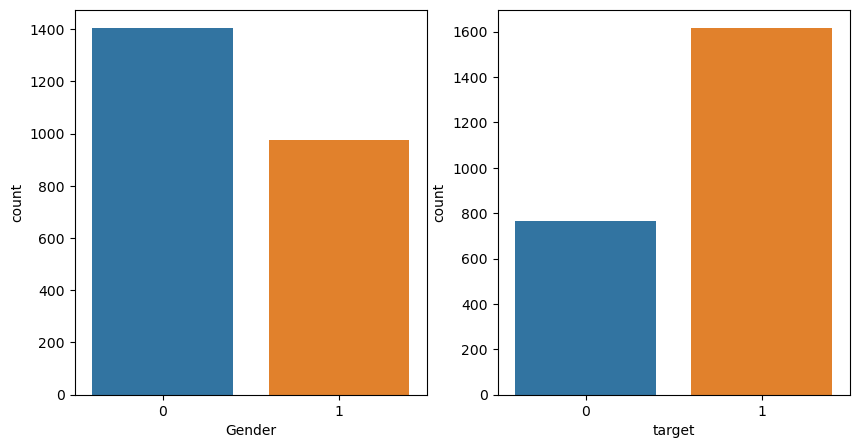

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='Gender',ax=ax[0])

sns.countplot(data=df,x='target',ax=ax[1])
plt.show()

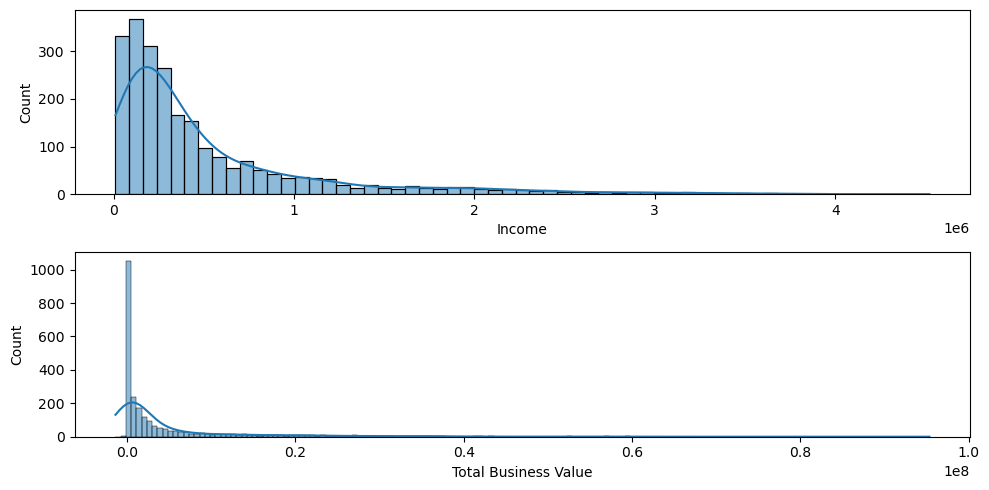

In [34]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
sns.histplot(data=df,x='Income',kde=True,ax=ax[0])

sns.histplot(data=df,x='Total Business Value',kde=True,ax=ax[1])
plt.tight_layout()
plt.show()

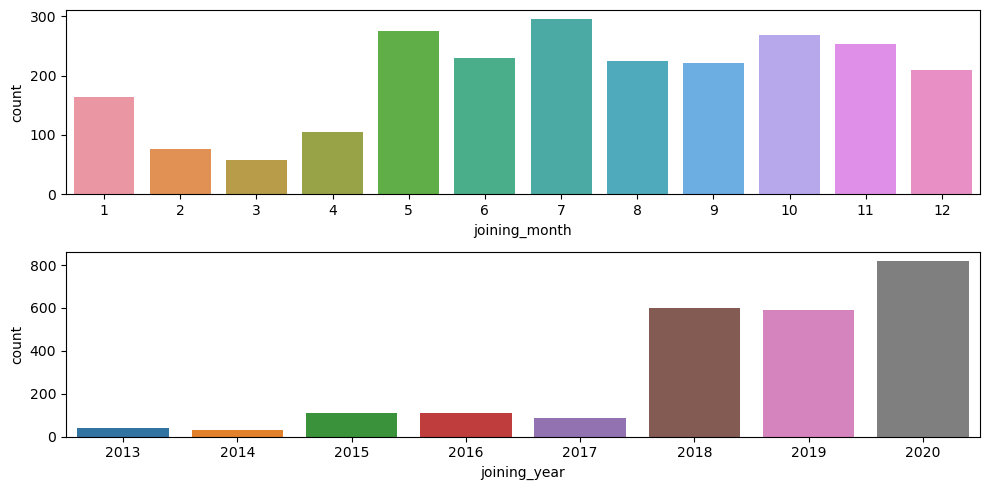

In [35]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
sns.countplot(data=df,x='joining_month',ax=ax[0])

sns.countplot(data=df,x='joining_year',ax=ax[1])
plt.tight_layout()
plt.show()

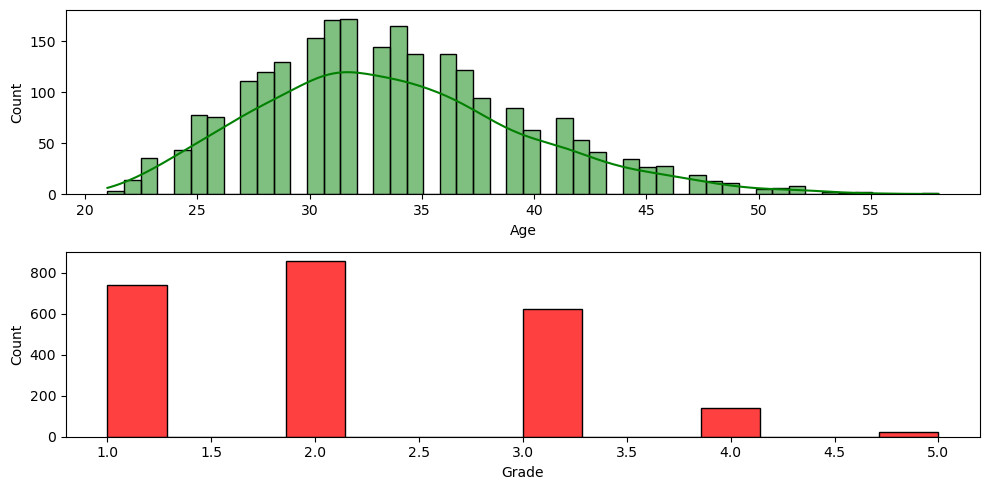

In [36]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
sns.histplot(data=df,x='Age',ax=ax[0],color='green',bins=50,kde=True)

sns.histplot(data=df,x='Grade',ax=ax[1],color='red')
plt.tight_layout()
plt.show()

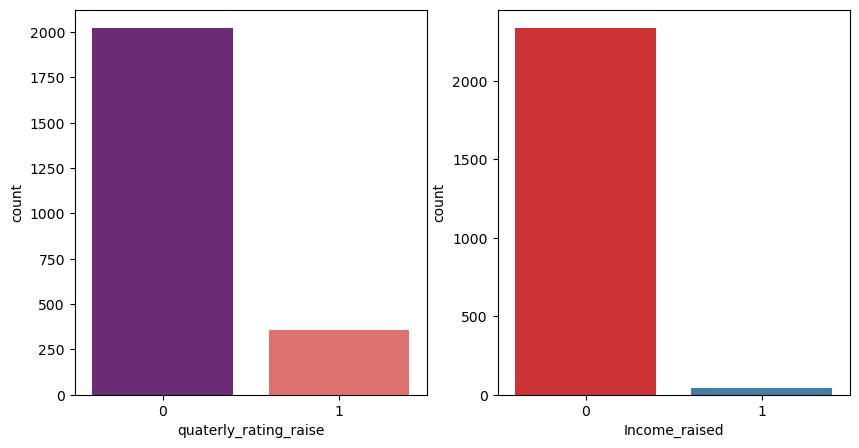

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x='quaterly_rating_raise',ax=ax[0],palette='magma')

sns.countplot(data=df,x='Income_raised',ax=ax[1],palette='Set1')
plt.show()

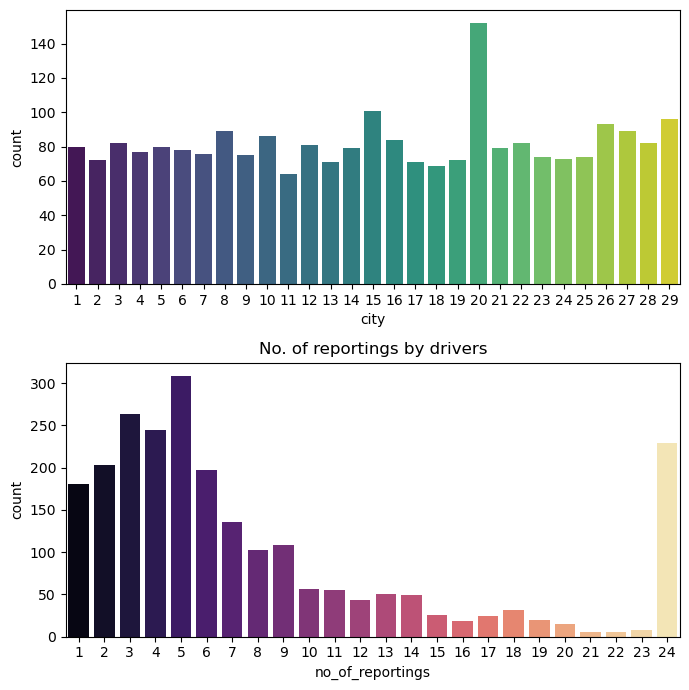

In [38]:
fig,ax=plt.subplots(2,1,figsize=(7,7))
plt.ylabel('No. of drivers in each city')
sns.countplot(data=df,x='city',ax=ax[0],palette='viridis')

sns.countplot(data=df,x='no_of_reportings',ax=ax[1],palette='magma')
plt.title('No. of reportings by drivers')
plt.tight_layout()
plt.show()

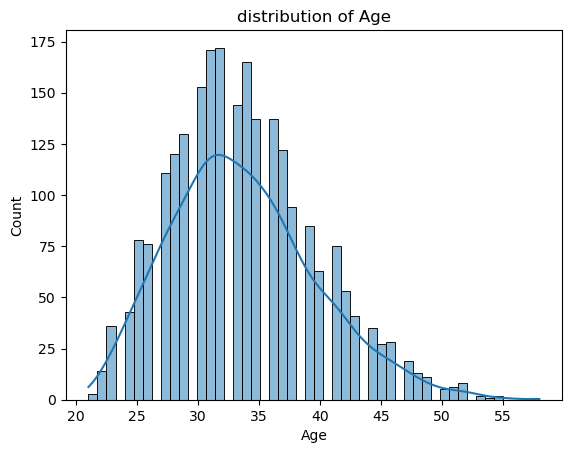

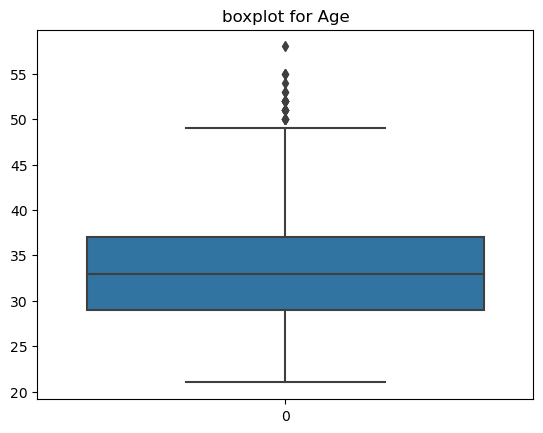

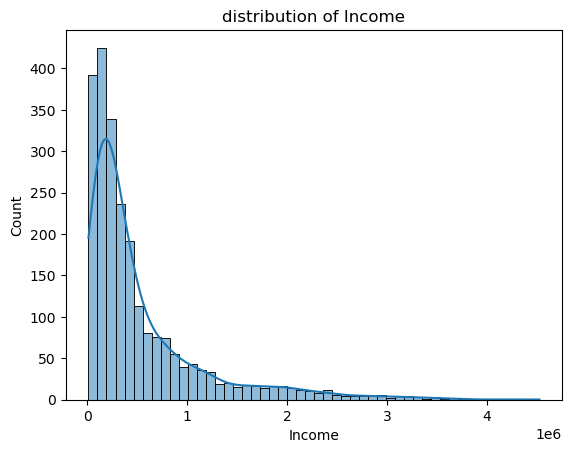

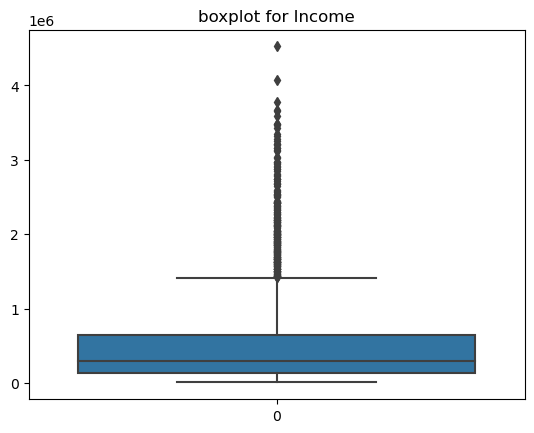

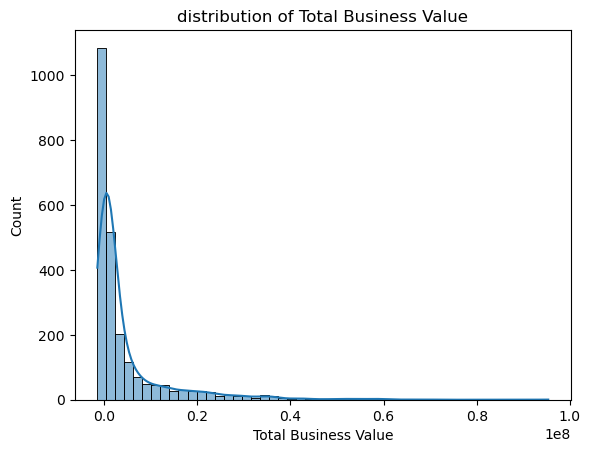

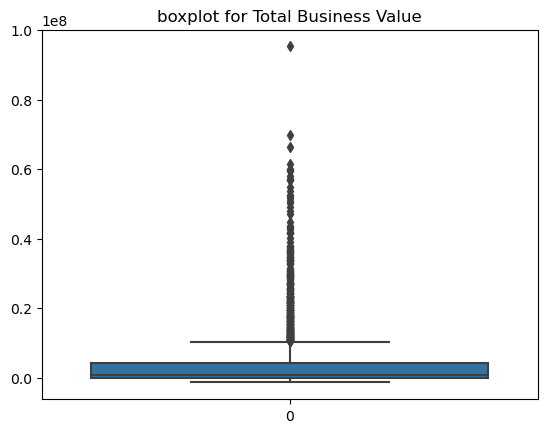

In [39]:
a = df[['Age','Income','Total Business Value']]
for i in a.columns:
    
    sns.histplot(a[i],bins=50,kde=True)
    plt.title(f'distribution of {i}')
    plt.show()
    sns.boxplot(a[i])
    plt.title(f'boxplot for {i}')
    plt.show()

### Bivariate Analysis

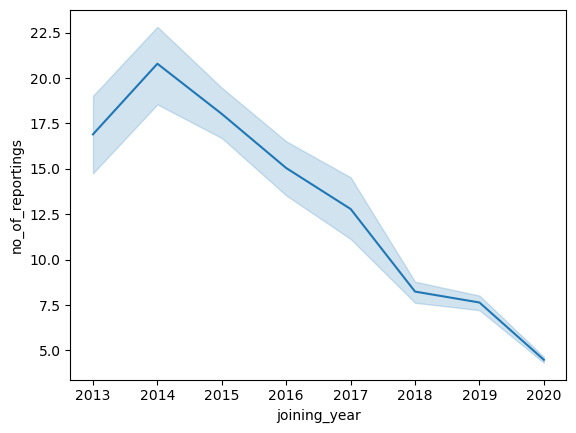

In [40]:
sns.lineplot(data=df,x='joining_year',y='no_of_reportings')
plt.show()

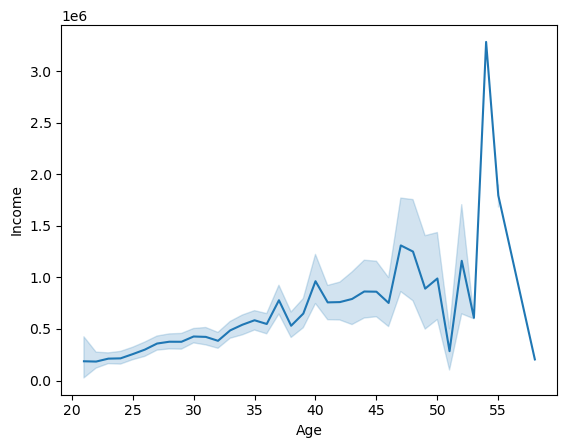

In [41]:
sns.lineplot(data=df,x='Age',y='Income')
plt.show()

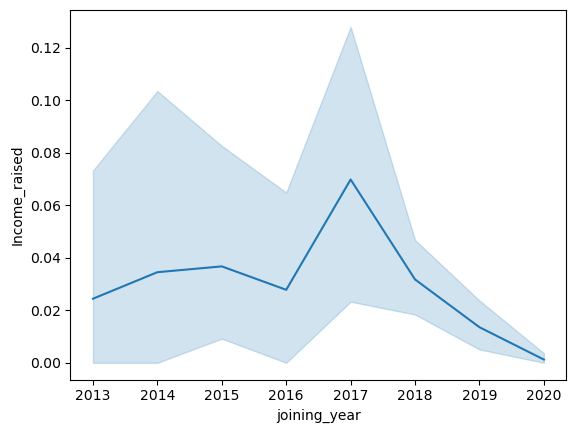

In [42]:
sns.lineplot(data=df,x='joining_year',y='Income_raised')
plt.show()

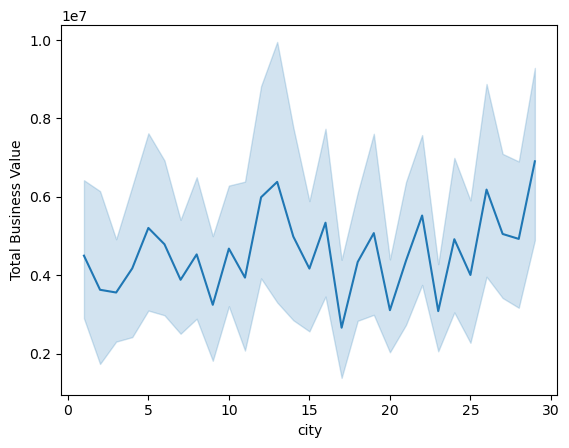

In [43]:
sns.lineplot(data=df,x='city',y='Total Business Value')
plt.show()

### Multivariate Analysis

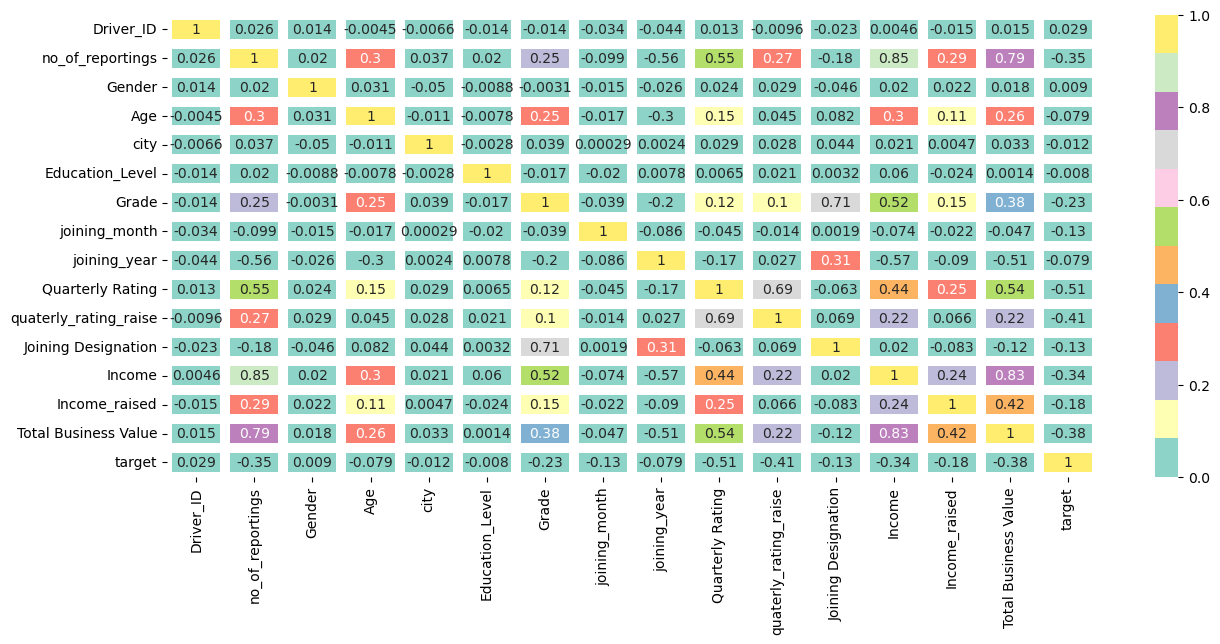

In [44]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,linewidth=6,linecolor='white',cmap='Set3',vmax=1,vmin=0)
plt.show()

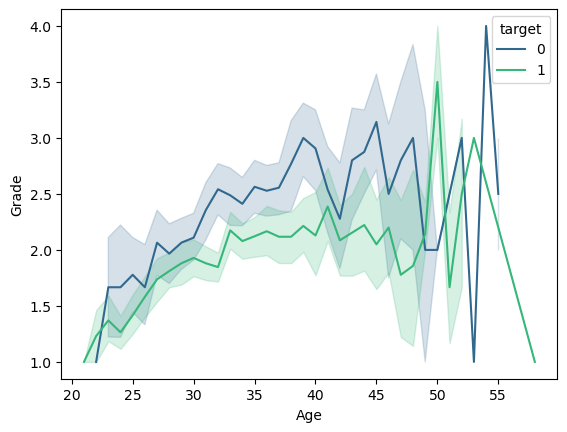

In [45]:
sns.lineplot(data=df,x='Age',y='Grade',hue='target',palette='viridis')
plt.show()

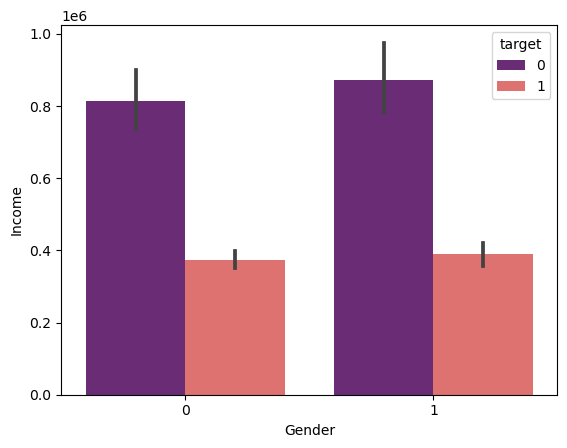

In [46]:
sns.barplot(data=df,x='Gender',y='Income',hue='target',palette='magma')
plt.show()

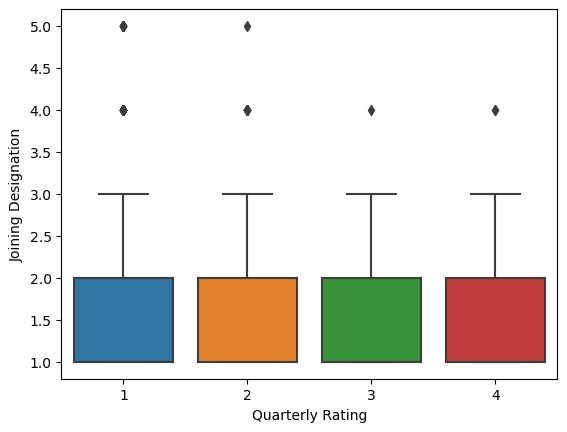

In [47]:
sns.boxplot(data=df,x='Quarterly Rating',y='Joining Designation')
plt.show()

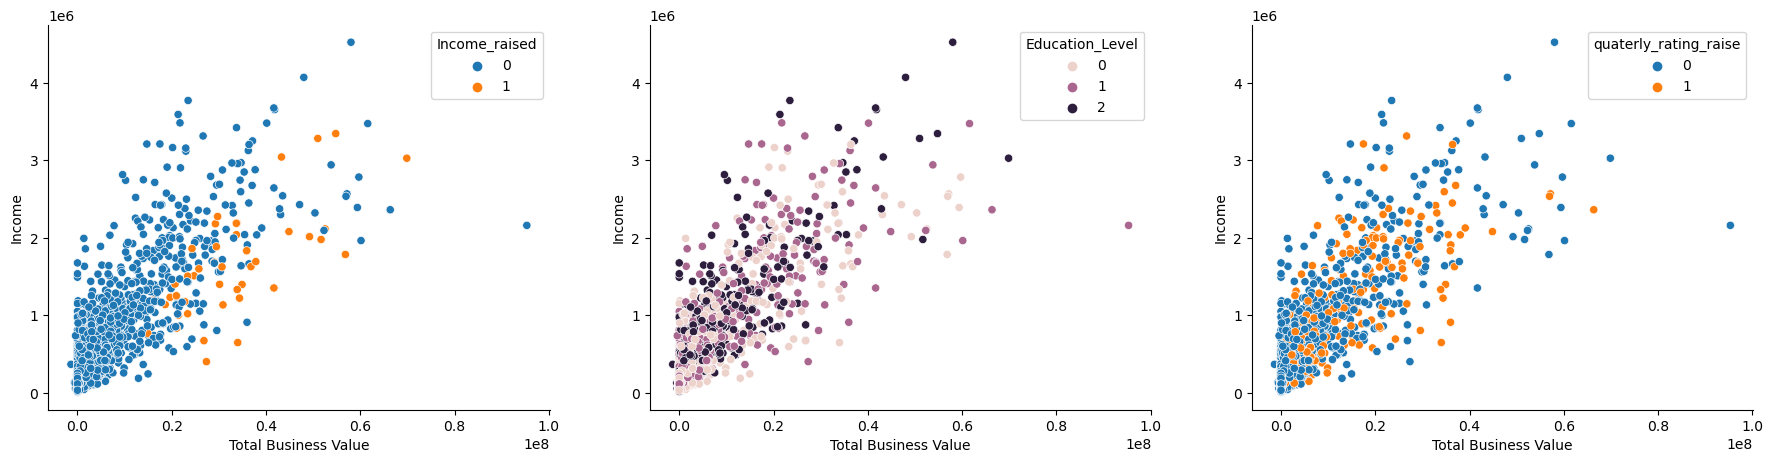

In [48]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df.Income_raised)
plt.subplot(1,3,2)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df.Education_Level)
plt.subplot(1,3,3)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df.quaterly_rating_raise)
sns.despine()
plt.show()

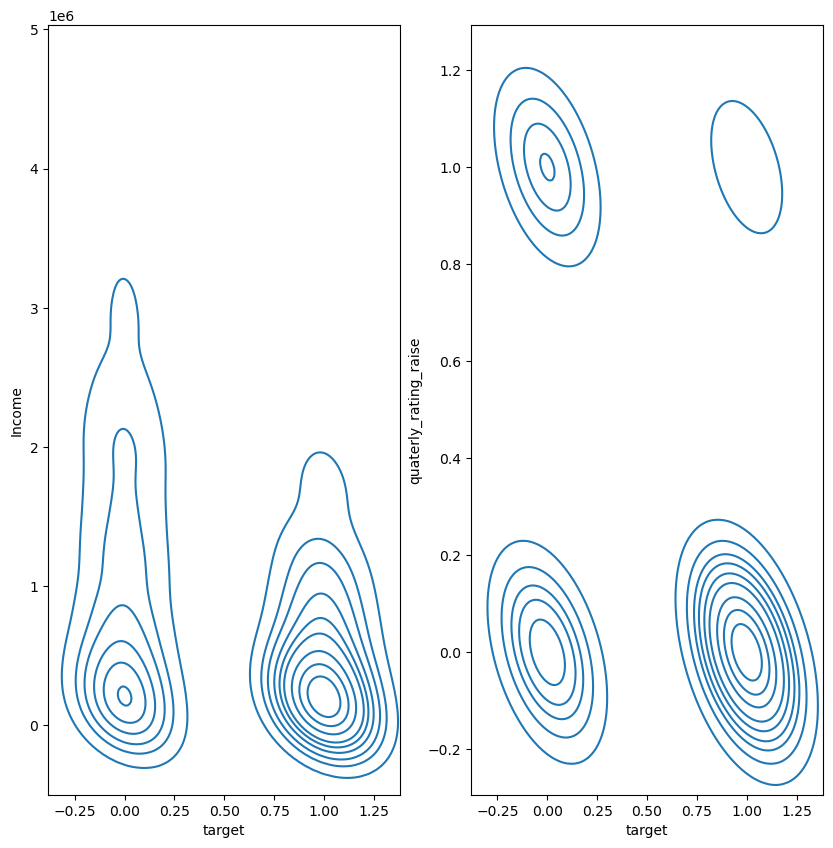

In [49]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
sns.kdeplot(data=df,x='target',y='Income',ax=ax[0])
sns.kdeplot(data=df,x='target',y='quaterly_rating_raise',ax=ax[1])
plt.show()

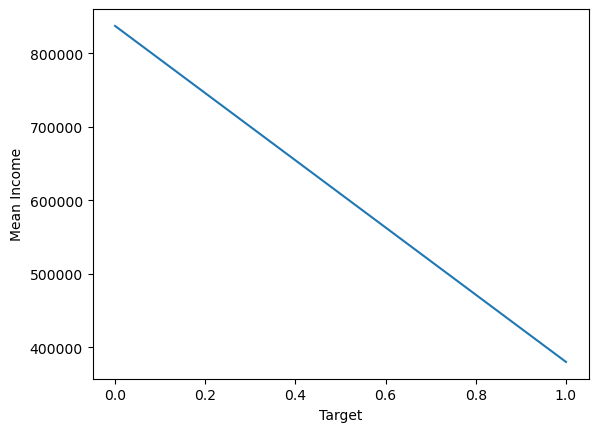

In [50]:
df.groupby('target')['Income'].mean().plot()
plt.ylabel('Mean Income')
plt.xlabel('Target')
plt.show()

## Outlier Treatment

In [51]:
cols = ['Age','Income','Total Business Value']
for i in cols:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    upper_whisker = q3 + 1.5*iqr
    lower_whisker = q1 - 1.5*iqr
    if lower_whisker<0:
        lower_whisker=0
    
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,df[i])
    df[i]=np.where(df[i]<lower_whisker,lower_whisker,df[i])

In [52]:
# No outliers are present in the following coulmns

for i in cols:
    print(f'No. of outliers in column {i} : {np.sum((df[i]>upper_whisker) | (df[i]<lower_whisker))}')

No. of outliers in column Age : 0
No. of outliers in column Income : 0
No. of outliers in column Total Business Value : 0


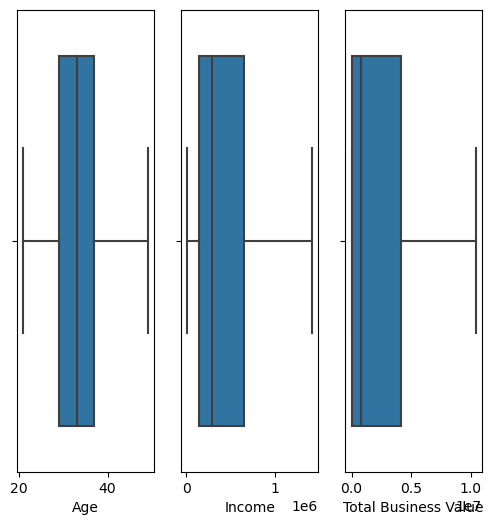

In [53]:

fig,ax=plt.subplots(1,3,figsize=(6,6))
sns.boxplot(data=df,x='Age',ax=ax[0])
sns.boxplot(data=df,x='Income',ax=ax[1])
sns.boxplot(data=df,x='Total Business Value',ax=ax[2])
plt.show() # No outliers left

In [54]:
df

,Driver_ID,no_of_reportings,Gender,Age,city,Education_Level,Grade,joining_month,joining_year,Quarterly Rating,quaterly_rating_raise,Joining Designation,Income,Income_raised,Total Business Value,target
0,1,3,0,28.0,23,2,1,12,2018,2,0,1,172161.0,0,1715580.0,1
1,2,2,0,31.0,7,2,2,11,2020,1,0,2,134032.0,0,0.0,0
2,4,5,0,43.0,13,2,2,12,2019,1,0,2,328015.0,0,350000.0,1
3,5,3,0,29.0,9,0,1,1,2019,1,0,1,139104.0,0,120360.0,1
4,6,5,1,31.0,11,1,3,7,2020,2,1,3,393640.0,0,1265000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,0,34.0,24,0,3,10,2015,4,1,2,1418797.5,0,10434125.0,0
2377,2785,3,1,34.0,9,0,1,8,2020,1,0,1,36315.0,0,0.0,1
2378,2786,9,0,45.0,19,0,2,7,2018,1,0,2,318330.0,0,2815090.0,1
2379,2787,6,1,28.0,20,2,1,7,2018,1,0,1,416988.0,0,977830.0,1


### Ensemble Learning

##### Here, we prioritize Recall more than Precision because Recall helps us to minimize False Negatives(F.N) and here to reduce attrition of drivers , we have to reduce False Negatives more than reducing False Positives. Also, we have to see that False Positives(F.p) do not increase disproportionately.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,roc_curve,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
# ! pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [56]:
df['target'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: target, dtype: float64

In [57]:
y = df[['target']]
X = df.drop('target',axis=1)

In [58]:
(X.shape,y.shape)

((2381, 15), (2381, 1))

In [59]:
X_tr_cv,X_test,y_tr_cv,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_tr_cv,y_tr_cv,test_size=0.2,random_state=42)

In [60]:
(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape)

((1428, 15), (1428, 1), (357, 15), (357, 1), (596, 15), (596, 1))

##### Treating Class Imbalance by SMOTE

In [61]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X_train,y_train)

In [62]:
y_sm.value_counts()

target
0         954
1         954
dtype: int64

#### Standardization of Data

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_sm)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
y_train = y_sm

In [64]:
X_train[:5]

array([[-1.10016937,  0.81314565, -0.72469294,  0.550841  ,  1.29874528,
        -1.19279571, -1.22598781,  0.83092462,  0.28358638,  1.68156609,
         2.18673688, -0.99249545,  0.86411339, -0.1152245 ,  0.44150083],
       [ 1.37920691, -0.12479142, -0.72469294,  0.19614472, -0.42731492,
         1.34722015,  0.96734059,  1.15984665,  0.28358638,  1.68156609,
         2.18673688,  1.41676831,  0.597597  , -0.1152245 ,  0.89967714],
       [ 1.02063525,  1.34910969,  1.37989477,  0.37349286,  0.55900519,
        -1.19279571,  2.06400479,  0.50200259, -3.20352088,  0.51613634,
        -0.45730239,  2.62140019,  1.95204518, -0.1152245 ,  1.72775025],
       [-0.8743075 , -0.39277344, -0.72469294, -0.51324783, -0.3040249 ,
         0.07721222,  3.16066899,  0.17308056, -0.29759817, -0.64929341,
        -0.45730239,  3.82603207,  0.6334791 , -0.1152245 , -0.82747276],
       [-0.39451055, -0.52676445,  1.37989477,  0.19614472, -1.53692504,
         1.34722015, -0.12932361,  0.83092462, 

In [65]:
X_val[:5]

array([[-0.6382372 , -0.79474647, -0.72469294,  0.550841  ,  1.5453253 ,
        -1.19279571,  0.96734059, -2.12937364,  0.28358638, -0.64929341,
        -0.45730239,  1.41676831, -0.83823956, -0.1152245 , -0.82747276],
       [ 0.6416467 ,  0.1431906 , -0.72469294, -0.15855155,  0.06584514,
         1.34722015,  2.06400479, -1.14260755,  0.28358638, -0.64929341,
        -0.45730239,  0.21213643,  1.55768683, -0.1152245 ,  0.78756361],
       [-1.32603123, -0.12479142, -0.72469294,  0.01879659,  0.80558522,
         1.34722015,  0.96734059, -0.48476349, -0.29759817, -0.64929341,
        -0.45730239,  1.41676831,  1.23038882, -0.1152245 , -0.0526965 ],
       [-1.5518931 ,  0.00919959,  1.37989477, -1.93203294, -1.04376498,
        -1.19279571, -0.12932361,  0.50200259, -0.29759817, -0.64929341,
        -0.45730239,  0.21213643, -0.41688807, -0.1152245 , -0.69278273],
       [ 0.82284661, -1.06272849,  1.37989477,  0.37349286, -1.29034501,
         1.34722015, -0.12932361,  1.48876868, 

### KNN Imputation

In [66]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
X_train = imp.fit_transform(X_train)
X_train[:5]

array([[-1.10016937,  0.81314565, -0.72469294,  0.550841  ,  1.29874528,
        -1.19279571, -1.22598781,  0.83092462,  0.28358638,  1.68156609,
         2.18673688, -0.99249545,  0.86411339, -0.1152245 ,  0.44150083],
       [ 1.37920691, -0.12479142, -0.72469294,  0.19614472, -0.42731492,
         1.34722015,  0.96734059,  1.15984665,  0.28358638,  1.68156609,
         2.18673688,  1.41676831,  0.597597  , -0.1152245 ,  0.89967714],
       [ 1.02063525,  1.34910969,  1.37989477,  0.37349286,  0.55900519,
        -1.19279571,  2.06400479,  0.50200259, -3.20352088,  0.51613634,
        -0.45730239,  2.62140019,  1.95204518, -0.1152245 ,  1.72775025],
       [-0.8743075 , -0.39277344, -0.72469294, -0.51324783, -0.3040249 ,
         0.07721222,  3.16066899,  0.17308056, -0.29759817, -0.64929341,
        -0.45730239,  3.82603207,  0.6334791 , -0.1152245 , -0.82747276],
       [-0.39451055, -0.52676445,  1.37989477,  0.19614472, -1.53692504,
         1.34722015, -0.12932361,  0.83092462, 

In [67]:
(X_train.shape,X_val.shape)

((1908, 15), (357, 15))

In [68]:
(y_train.shape,y_val.shape)

((1908, 1), (357, 1))

In [69]:
(X_test.shape,y_test.shape)

((596, 15), (596, 1))

### Model Building

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [71]:
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

In [72]:
params_rf = {
    'n_estimators':[100,200],
    'max_depth':[5,7,8,9],
    'bootstrap':[True,False],
    'max_features':[11,12,13]
}

In [73]:
params_gb = {
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[5,7,8,9]
}

In [74]:
grid_model_rf = GridSearchCV(estimator=rf_model,param_grid=params_rf,scoring='recall',cv=3,n_jobs=-1)

In [75]:
grid_model_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 7, 8, 9],
                         'max_features': [11, 12, 13],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [76]:
grid_model_rf.best_params_

{'bootstrap': True, 'max_depth': 8, 'max_features': 11, 'n_estimators': 200}

In [77]:
grid_model_rf.best_score_

0.9046121593291406

In [78]:
grid_model_gb = GridSearchCV(estimator=gb_model,param_grid=params_gb,scoring='recall',cv=3,n_jobs=-1)

In [79]:
grid_model_gb.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 7, 8, 9],
                         'n_estimators': [100, 200]},
             scoring='recall')

In [80]:
grid_model_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}

In [81]:
grid_model_gb.best_score_

0.9119496855345912

#### Retraining both the models with best parameters

In [82]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=9,max_features=12,bootstrap=True)

In [83]:
model_rf.fit(X_train,y_train)
model_rf.score(X_val,y_val)

0.9019607843137255

In [84]:
model_gb = GradientBoostingClassifier(n_estimators=200,max_depth=7,learning_rate=0.2)
model_gb.fit(X_train,y_train)
model_gb.score(X_val,y_val)

0.9159663865546218

#### Both Random Forest and Gradient Boosting are giving the same accuracy

In [85]:
# testing accuracy on test data
(model_rf.score(X_test,y_test),model_gb.score(X_test,y_test))

(0.8976510067114094, 0.9060402684563759)

### Checking with XGBoost and LightGBM

In [86]:
from xgboost import XGBClassifier
params_xg = {
    'n_estimator':[100,150,200],
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.2,0.3],
    
}

In [87]:
xgb = XGBClassifier(objective='multi:softmax',num_class=2,silent=True,n_jobs=-1)

In [88]:
gs_xgb = GridSearchCV(xgb,param_grid=params_xg,scoring='recall',cv=3,n_jobs=-1)
gs_xgb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_class=2,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimator': [100, 150, 200]},
             scoring='recall')

In [89]:
gs_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimator': 100}

### Retraining the model with best parameters

In [90]:
xgb = XGBClassifier(**gs_xgb.best_params_,objective='multi:softmax',num_class=2,silent=True)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_class=2, ...)

In [91]:
xgb.score(X_train,y_train)

1.0

In [92]:
xgb.score(X_val,y_val)

0.9131652661064426

In [93]:
xgb.score(X_test,y_test)

0.9161073825503355

#### Using LightGBM

In [94]:
from lightgbm import LGBMClassifier
clf=LGBMClassifier(learning_rate=0.3, max_depth= 3, n_estimator= 100)

In [95]:
clf.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Number of positive: 954, number of negative: 954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 1908, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

LGBMClassifier(learning_rate=0.3, max_depth=3, n_estimator=100)

In [96]:
clf.score(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator


0.990041928721174

In [97]:
clf.score(X_val,y_val)

[LightGBM] [Warning] Unknown parameter: n_estimator


0.9019607843137255

In [98]:
clf.score(X_test,y_test)

[LightGBM] [Warning] Unknown parameter: n_estimator


0.9110738255033557

In [99]:
accuracies = {'LightGBM':clf.score(X_test,y_test),'XGBoost':xgb.score(X_test,y_test),'Random_forest':model_rf.score(X_test,y_test),'Gradient_boosting':model_gb.score(X_test,y_test)}
accuracies

[LightGBM] [Warning] Unknown parameter: n_estimator


{'LightGBM': 0.9110738255033557,
 'XGBoost': 0.9161073825503355,
 'Random_forest': 0.8976510067114094,
 'Gradient_boosting': 0.9060402684563759}

In [100]:
highest_accuracy=np.max(list(accuracies.values()))
highest_accuracy

0.9161073825503355

In [101]:

y_pred = model_gb.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

#### Confusion Matrix

In [102]:
cm = confusion_matrix(y_test,y_pred)
cm 

array([[170,  23],
       [ 33, 370]], dtype=int64)

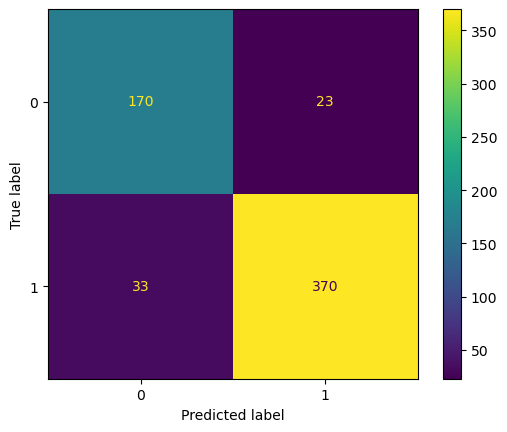

In [103]:
ConfusionMatrixDisplay(cm).plot();
plt.show()

In [104]:
print('Recall score for test data',recall_score(y_test,y_pred))

Recall score for test data 0.9181141439205955


In [105]:
model_rf_imp = model_rf.feature_importances_
model_rf_imp

array([0.03702536, 0.08896765, 0.0071376 , 0.035175  , 0.03690003,
       0.01230123, 0.00923791, 0.12052355, 0.21673995, 0.23649075,
       0.01159911, 0.01586272, 0.06771409, 0.00051572, 0.10380932])

In [106]:
model_gb_imp = model_gb.feature_importances_
model_gb_imp

array([3.74364811e-02, 8.81567082e-02, 6.93873008e-03, 2.73704312e-02,
       3.94499192e-02, 1.10661530e-02, 1.02245492e-02, 1.28705002e-01,
       2.02771858e-01, 2.60366200e-01, 3.55597565e-03, 9.79602457e-03,
       8.14076620e-02, 4.04059148e-05, 9.27139001e-02])

### Assessing importance of various features

In [107]:
model_importances_data = pd.DataFrame({'Features':X.columns,'RandomForestClassifier':model_rf_imp,'GradientBoostingClassifier':model_gb_imp})
model_importances_data = model_importances_data.sort_values(by=['RandomForestClassifier','GradientBoostingClassifier'],ascending=[False,False]).reset_index(drop=True)
model_importances_data

,Features,RandomForestClassifier,GradientBoostingClassifier
0,Quarterly Rating,0.236491,0.260366
1,joining_year,0.216740,0.202772
2,joining_month,0.120524,0.128705
3,Total Business Value,0.103809,0.092714
4,no_of_reportings,0.088968,0.088157
5,Income,0.067714,0.081408
6,Driver_ID,0.037025,0.037436
7,city,0.036900,0.039450
8,Age,0.035175,0.027370
9,Joining Designation,0.015863,0.009796


<Axes: xlabel='RandomForestClassifier', ylabel='Features'>

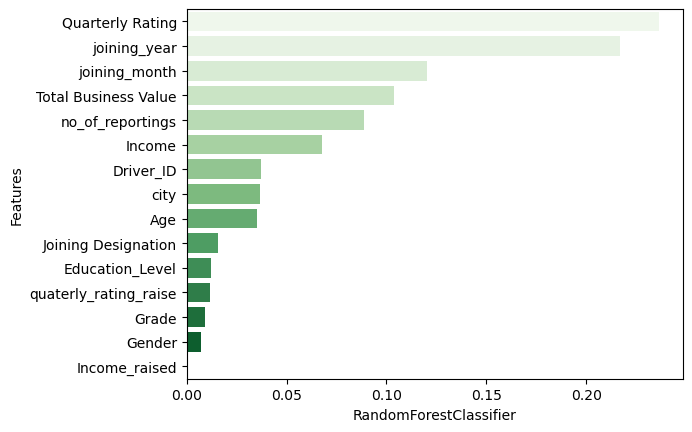

In [108]:
sns.barplot(data=model_importances_data,y='Features',x='RandomForestClassifier',palette='Greens')

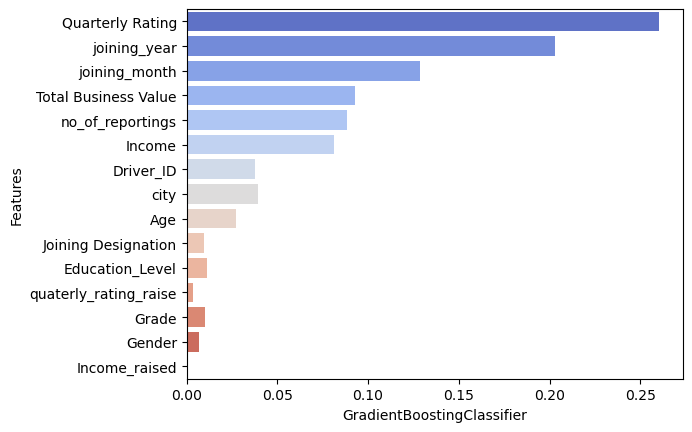

In [109]:
sns.barplot(data=model_importances_data,y='Features',x='GradientBoostingClassifier',palette='coolwarm')
plt.show()

### Finding ROC AUC for both models

In [110]:
y_pred_prob_rf = model_rf.predict_proba(X_test)
y_pred_prob_rf # For Random forest model

array([[2.38838179e-02, 9.76116182e-01],
       [5.76923077e-04, 9.99423077e-01],
       [9.80381091e-01, 1.96189092e-02],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [9.90000000e-01, 1.00000000e-02],
       [0.00000000e+00, 1.00000000e+00]])

In [111]:
y_pred_prob_gb = model_gb.predict_proba(X_test)
y_pred_prob_gb # For Gradient Boosting model

array([[2.75814687e-07, 9.99999724e-01],
       [5.27487186e-07, 9.99999473e-01],
       [9.99999597e-01, 4.03391300e-07],
       ...,
       [1.83224474e-08, 9.99999982e-01],
       [9.99999914e-01, 8.64748191e-08],
       [5.25490064e-08, 9.99999947e-01]])

#### Lets check the roc_auc score 

In [112]:
ar_rf=roc_auc_score(y_test,y_pred_prob_rf[:,1]) # for Random Forest
ar_rf

0.9583627971560447

In [113]:
ar_gb=roc_auc_score(y_test,y_pred_prob_gb[:,1]) # for Gradient Boosting
ar_gb

0.9575978091772844

In [114]:
from sklearn.metrics import roc_curve

fpr1,tpr1,thresholds1 = roc_curve(y_test,y_pred_prob_rf[:,1]) # for Random Forest
fpr2,tpr2,thresholds2 = roc_curve(y_test,y_pred_prob_gb[:,1]) # for Gradient Boosting

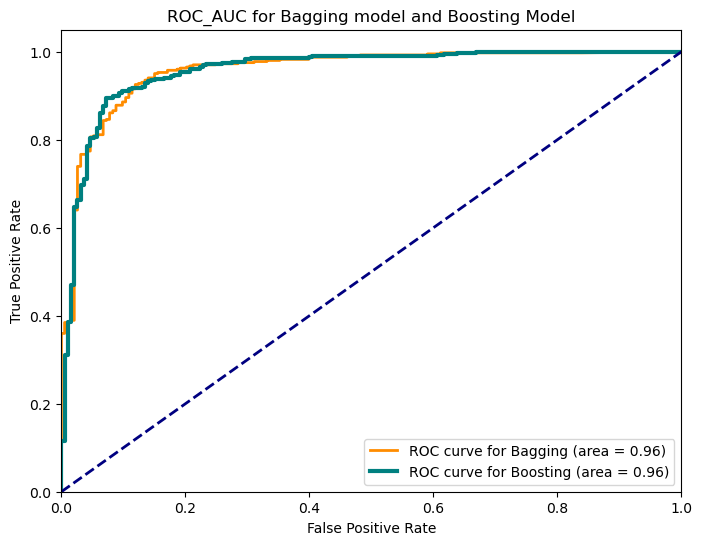

In [115]:
# Lets plot for Random Forest

plt.figure(figsize=(8,6))
plt.plot(fpr1,tpr1,color='darkorange',lw=2,label=f'ROC curve for Bagging (area = {ar_rf:.2f})')
plt.plot(fpr2,tpr2,color='teal',lw=3,label=f'ROC curve for Boosting (area = {ar_gb:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC for Bagging model and Boosting Model')
plt.legend(loc='best')
plt.show()

In [116]:
## Accuracy on train data
print('Accuracy of Random Forest Model : ',model_rf.score(X_train,y_train))
print('Accuracy of Gradient Boosting : ', model_gb.score(X_train,y_train))

Accuracy of Random Forest Model :  0.9848008385744235
Accuracy of Gradient Boosting :  1.0


In [117]:
## Accuracy on validation data
print('Accuracy of Random Forest Model : ',model_rf.score(X_val,y_val))
print('Accuracy of Gradient Boosting : ', model_gb.score(X_val,y_val))

Accuracy of Random Forest Model :  0.9019607843137255
Accuracy of Gradient Boosting :  0.9159663865546218


In [118]:
# Accuracy on testing data
print('Accuracy of Random Forest Model : ',model_rf.score(X_test,y_test))
print('Accuracy of Gradient Boosting : ', model_gb.score(X_test,y_test))

Accuracy of Random Forest Model :  0.8976510067114094
Accuracy of Gradient Boosting :  0.9060402684563759


### Classification Report

In [120]:
from sklearn.metrics import classification_report

In [121]:
report1 = classification_report(y_test,y_pred)

In [122]:
print(report1)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       193
           1       0.94      0.92      0.93       403

    accuracy                           0.91       596
   macro avg       0.89      0.90      0.89       596
weighted avg       0.91      0.91      0.91       596



In [123]:
report2 = classification_report(y_test,model_gb.predict(X_test))
print(report2)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       193
           1       0.94      0.92      0.93       403

    accuracy                           0.91       596
   macro avg       0.89      0.90      0.89       596
weighted avg       0.91      0.91      0.91       596



## Actionable Insights

#### 1. There are 59% males and 41% women drivers.
#### 2. Male drivers earn more than female drivers.
#### 3. Male drivers have left the company(attrition) more than the female drivers.
#### 4. The major chunk of drivers lie in the age group of 28-40 years.
#### 5. Most of drivers have got rating of 2-2.5.
#### 6. Most no. of joinings is in the year 2020.
#### 7. Only 1.8% of drivers have their income raised.
#### 8. Only 15% of drivers have their quarterly rating raised from the last one.
#### 9. Most of income is raised for drivers who have joined in year 2017.
#### 10. There is uneven distribution between Age and Grade.
#### 11. Most important feature for Random Foerst Classifier is Joining year.
#### 12. Most important feature for Gradient Boosting Classifier is Quarterly Ratings.
#### 13. Most important metric is Recall to reduce the False Negatives for Attrition.
#### 14. Both models give the same accuracy for the prediction i.e nearly 90%
#### 15. Both models give the same value for roc_auc_score(0.96).

## Business Recommendations

### 1. Gender Pay Equity and Support:
##### Address the gender pay gap by ensuring equal compensation for both male and female drivers. Implement support programs to encourage female drivers to stay with the company, as they appear to have lower attrition rates.

### 2. Retention Initiatives for Male Drivers:
##### Implement retention initiatives, such as improved incentives or work conditions, specifically targeting male drivers who are leaving the company at a higher rate.

### 3. Age-Group Focused Initiatives:
##### Develop targeted programs for drivers in the age group of 28-40, as this demographic comprises a significant portion of the driver workforce. These programs could include tailored incentives, support, and career development opportunities.

### 4. Rating Improvement Programs:
##### Launch programs that help drivers improve their customer ratings, as this metric appears to impact attrition. This can involve training on customer service and feedback mechanisms.

### 5. Joining Year-Based Incentives:
##### Create special incentives or rewards for drivers who joined in the year 2017, as this group has shown higher income growth. This can encourage new drivers to stay with the company.

### 6. Performance Feedback and Support:
##### Provide regular feedback to drivers to help them raise their quarterly ratings. This can be tied to incentives, helping drivers see a clear path to improving their ratings.

### 7. Use Age and Grade Distribution for Targeting:
##### Utilize the uneven distribution between age and grade to customize support programs for different segments of drivers, ensuring that their specific needs and expectations are met.

### 8. Machine Learning Model Utilization:
##### Use the Random Forest Classifier and Gradient Boosting Classifier models to predict driver attrition. Implement their recommendations for identifying at-risk drivers and creating personalized retention strategies.

### 9. Recall-Focused Attrition Mitigation:
##### Prioritize recall as the key metric to reduce false negatives in attrition prediction. This ensures that drivers who are at risk of leaving are accurately identified and targeted with retention efforts.

### 10. Accuracy and ROC_AUC Monitoring:
##### Continuously monitor model accuracy and ROC_AUC scores, ensuring that predictive models remain reliable. Make necessary adjustments to the models to adapt to changing driver behaviors.

### 11. Driver Community Building:
##### Foster a sense of community among drivers, both male and female, to create a supportive network and enhance driver satisfaction. This can include online forums, events, and networking opportunities.

### 12. Regular Compensation Reviews:
##### Commit to regular compensation reviews to ensure that drivers are fairly compensated, and their income remains competitive within the market.

### 13. Transparency and Communication:
##### Enhance transparency in the evaluation and rewards process, ensuring that drivers understand how they are rated, compensated, and supported within the company.

##### By implementing these recommendations, Ola can work to reduce driver attrition and build a more inclusive and supportive environment for all its drivers, leading to increased driver satisfaction and loyalty.